# Linear Regression with Gradient Descent

In [15]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

### Define the True Function and Generate the Sample Data

In [3]:
alpha_true = 0.5                      # true alpha value
beta_true = 1                         # true beta value
n = 50                                # number of points in the data set
x = np.random.uniform(0, 5.5, n)      # x coordinates, i.e. the independent variable values
y_true = alpha_true * x + beta_true   # the line that plots the dependency between x and t
t = alpha_true * x + beta_true + (np.random.rand(n) - 0.5)   # target values, i.e. the dependent variable values

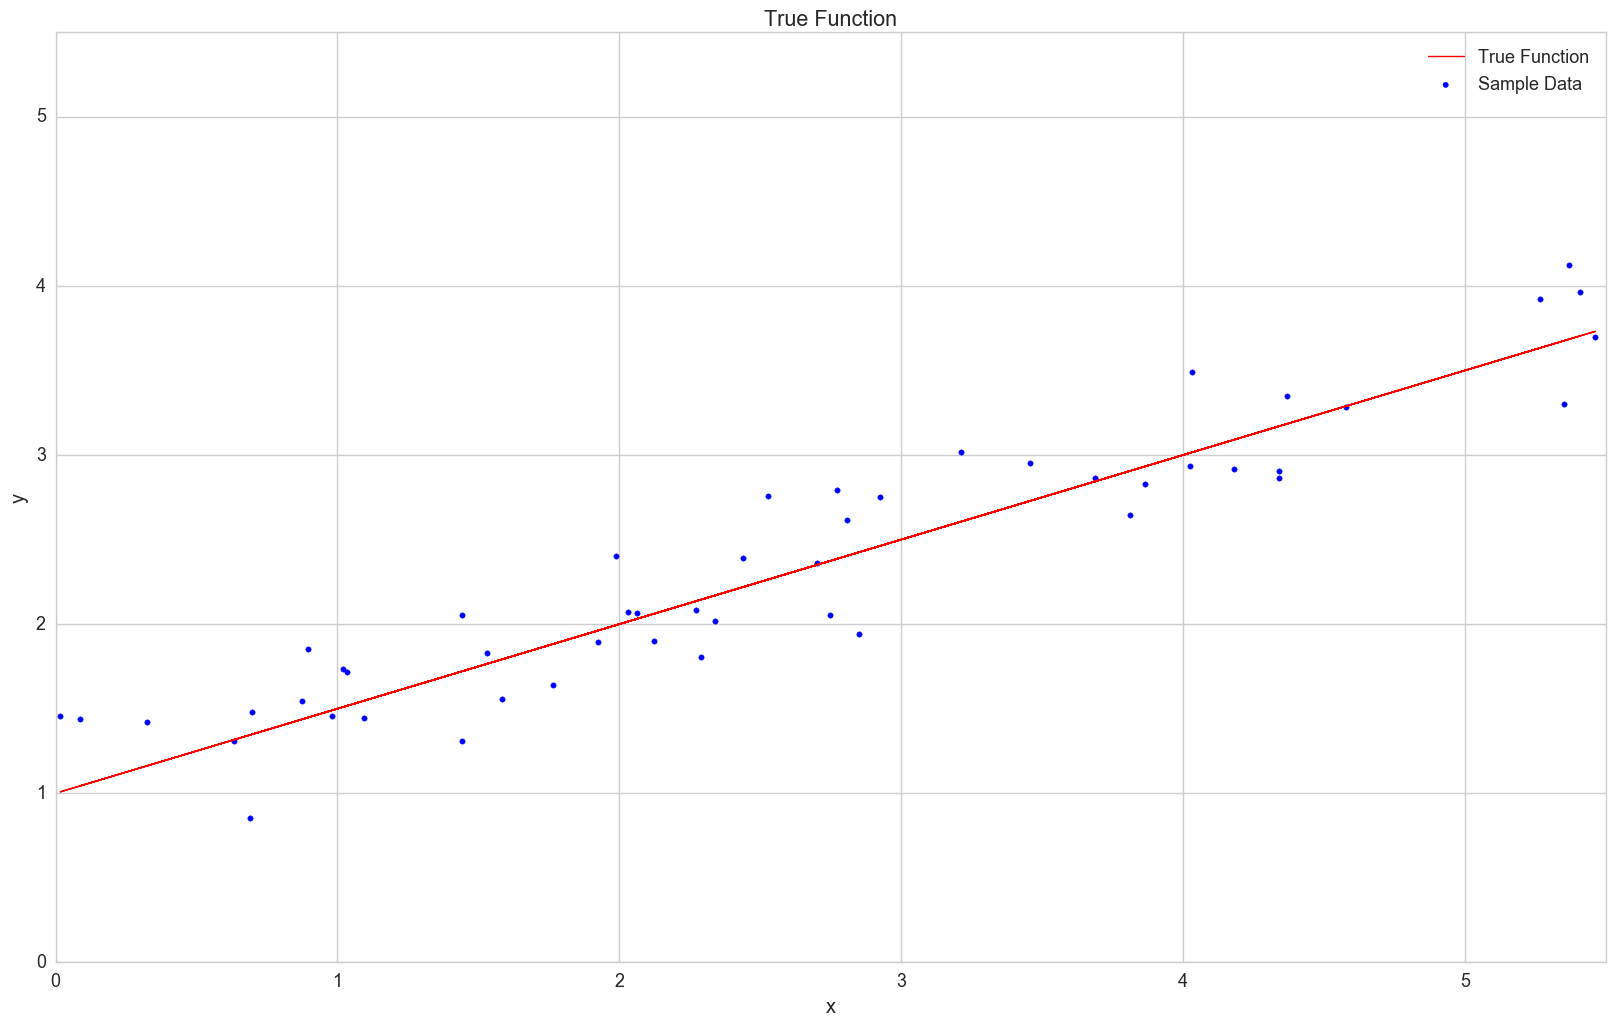

In [4]:
# this is the data set
_ = plt.scatter(x, t, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.plot(x, y_true, color='r', linewidth=linewidth, label='True Function')
_ = plt.xlim((0, 5.5))
_ = plt.ylim((0, 5.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function')
_ = plt.legend()

### Implement Gradient Descent

In [5]:
# error function
def error(a, b):
    s = 0
    for i in range(n):
        s += math.pow((a*x[i] + b) - t[i], 2)
    return 0.5 * s

In [6]:
# vectorized error function
@np.vectorize
def errorv(a, b):
    return error(a, b)

In [7]:
# create a point grid to plot the error function
ran_alpha = np.linspace(-3, 5, 10)
ran_beta = np.linspace(-5, 10, 10)
ran_alpha, ran_beta = np.meshgrid(ran_alpha, ran_beta)
e = errorv(ran_alpha, ran_beta)

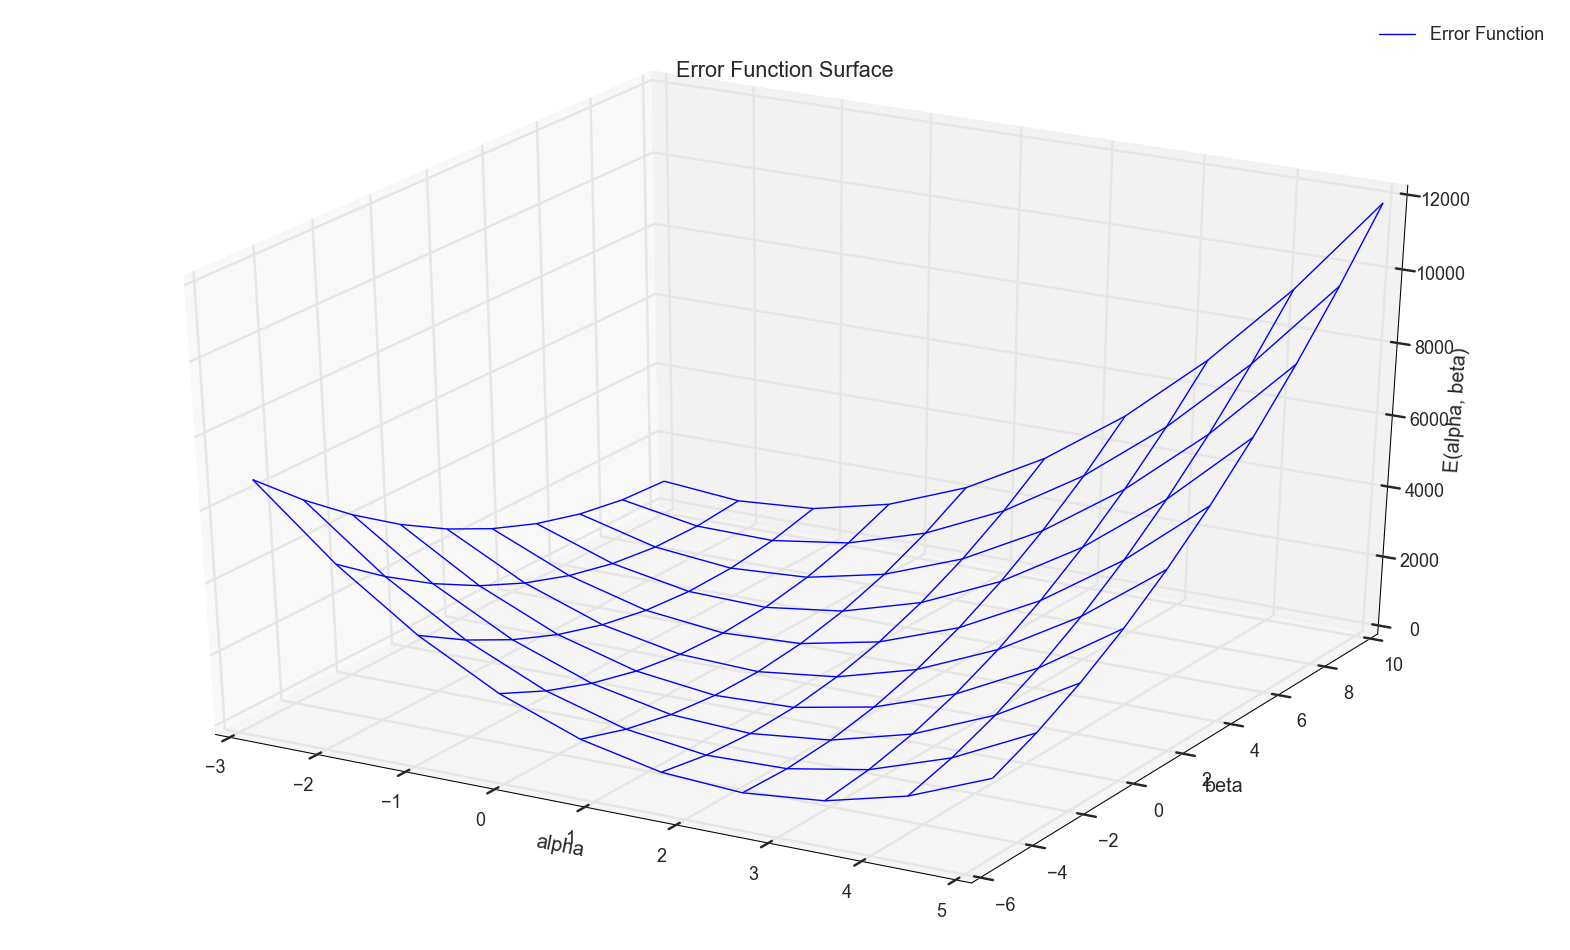

In [8]:
# this is how the surface defined by the error function values looks like
ax = plt.figure().add_subplot(111, projection='3d')
_ = ax.plot_wireframe(ran_alpha, ran_beta, e, linewidth=linewidth, label='Error Function')
_ = ax.set_xlabel('alpha')
_ = ax.set_ylabel('beta')
_ = ax.set_zlabel('E(alpha, beta)')
_ = plt.title('Error Function Surface')
_ = plt.legend()

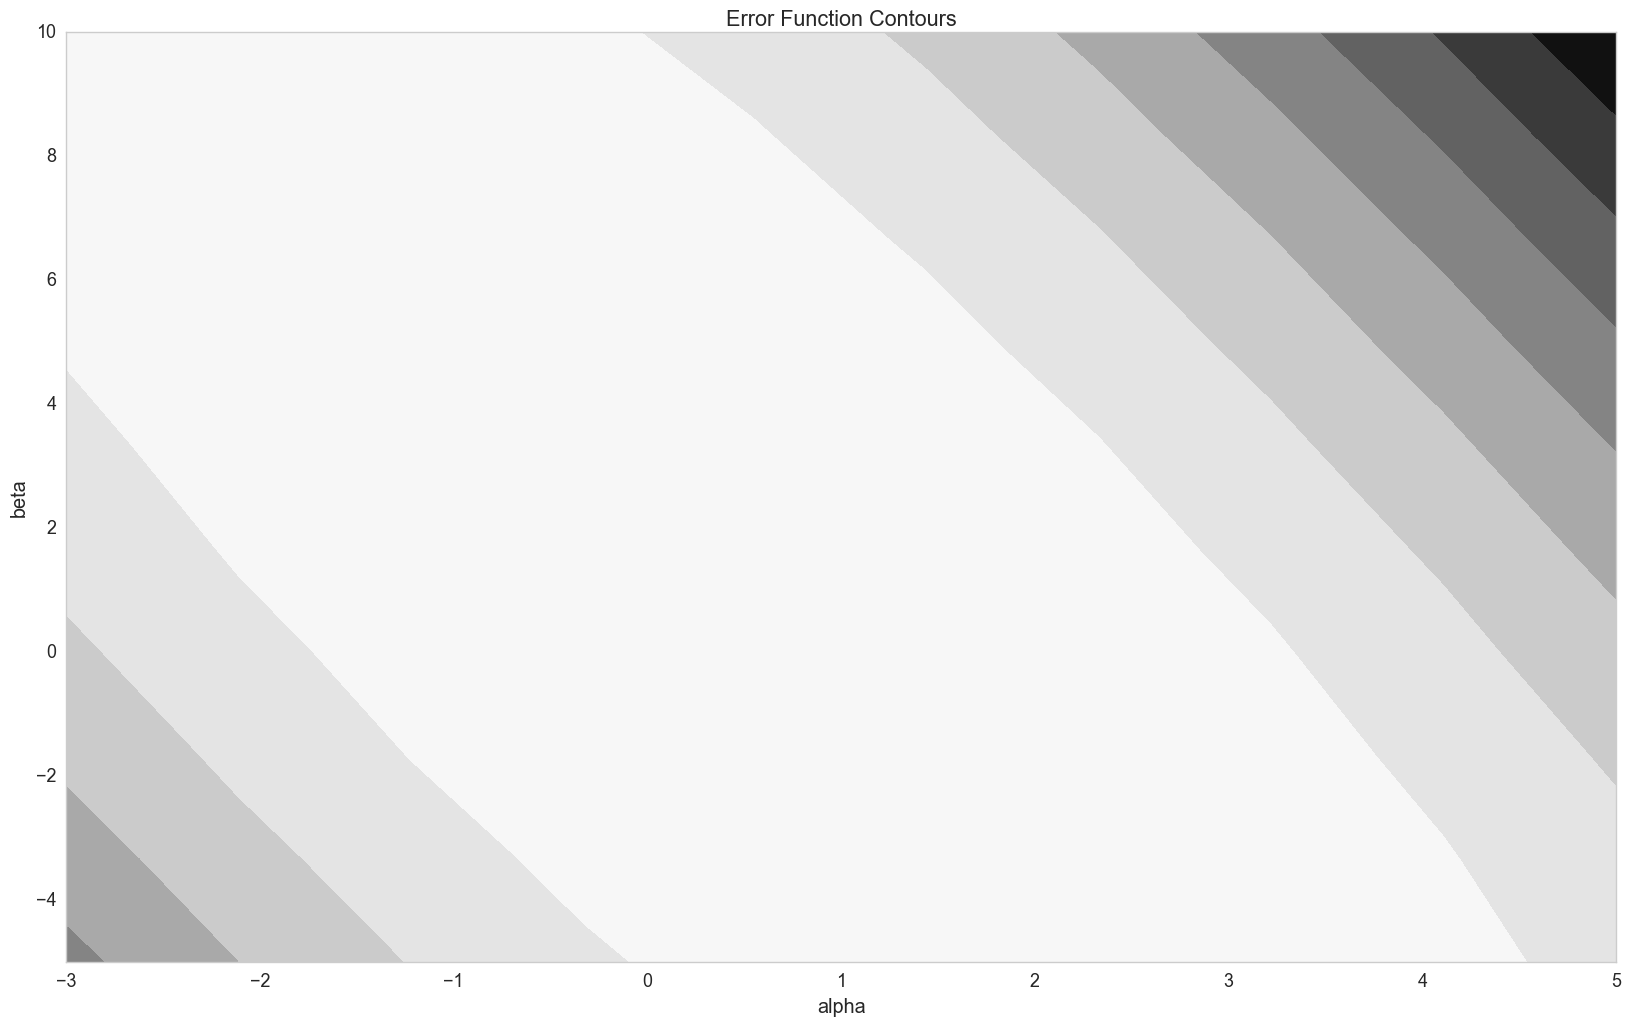

In [9]:
# this is the contour plot of the error function
_ = plt.contourf(ran_alpha, ran_beta, e, label='Error Function Contour')
_ = plt.xlabel('alpha')
_ = plt.ylabel('beta')
_ = plt.xlim((-3, 5))
_ = plt.ylim((-5, 10))
_ = plt.title('Error Function Contours')

In [10]:
# partial derivative of the error function with respect to a
def dda_error(a, b):
    s = 0
    for i in range(n):
        s += x[i] * (a*x[i] + b - t[i])
    return s

In [11]:
# partial derivative of the error function with respect to b
def ddb_error(a, b):
    s = 0
    for i in range(n):
        s += a*x[i] + b - t[i]
    return s

### Perform Gradient Descent

In [12]:
error_threshold = 0.0000001    # stop the algo. if the change is smaller than this
step_size = 0.0001             # step size towards the steepest gradient

# initialization
alpha_old = 0
beta_old = 0

alpha_new = 0.1
beta_new = 0.1

i = 0

# gradient descent algorithm
while abs(error(alpha_old, beta_old) - error(alpha_new, beta_new)) > error_threshold:
    i += 1
    
    alpha_old = alpha_new
    beta_old = beta_new
    
    alpha_new = alpha_old - step_size * dda_error(alpha_old, beta_old)
    beta_new = beta_old - step_size * ddb_error(alpha_old, beta_old)

In [13]:
print 'iterations:           ', i
print 'alpha approximation:  ', alpha_new
print 'beta approximation:   ', beta_new

iterations:            4847
alpha approximation:   0.485592049978
beta approximation:    1.08165474028


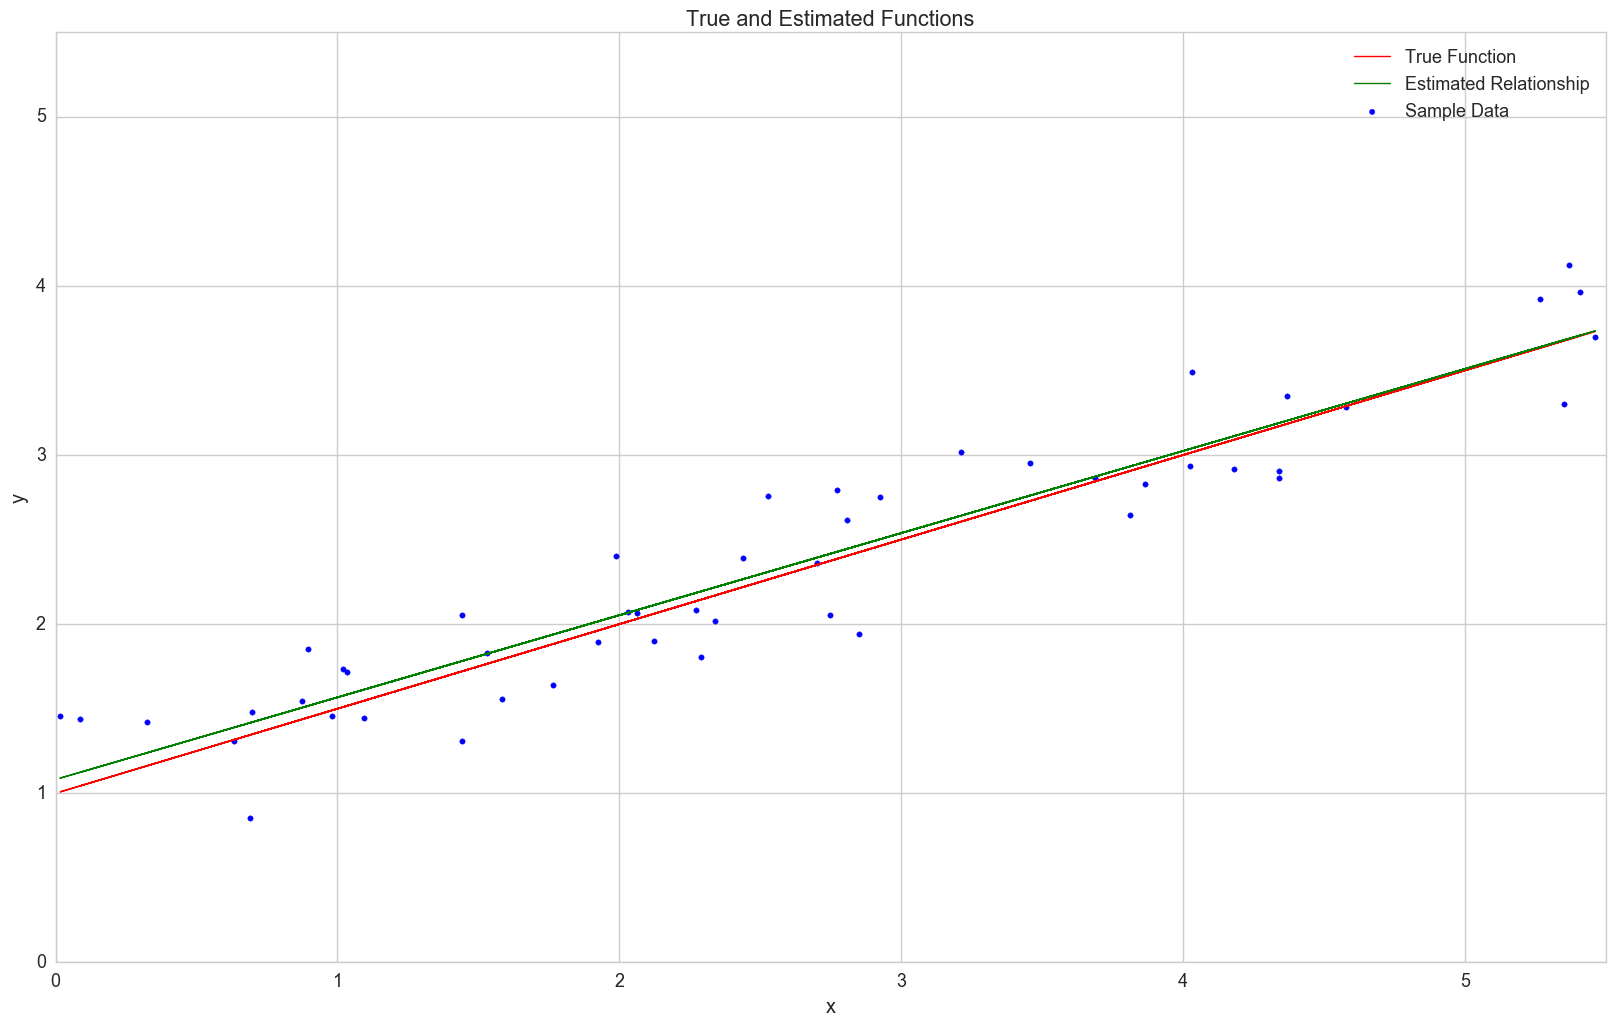

In [14]:
# this is the solution
y_new = alpha_new * x + beta_new
_ = plt.scatter(x, t, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.plot(x, y_true, color='r', linewidth=linewidth, label='True Function')
_ = plt.plot(x, y_new, color='g', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((0, 5.5))
_ = plt.ylim((0, 5.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Functions')
_ = plt.legend()